In [48]:
!pip install squarify

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import squarify as sq
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

https://archive.ics.uci.edu/ml/datasets/online+retail

In [50]:
data = pd.read_excel("C:/Users/imoge/Projects/Datasets/Online Retail.xlsx")

In [51]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
data.shape

(541909, 8)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [101]:
# Drop columns not required
df = data.drop(columns = ["StockCode","CustomerID"],axis = 1)

In [102]:
# Clean up the description column of whitespaces
df["Description"] = df["Description"].str.strip()

In [103]:
df.shape

(541909, 6)

In [104]:
# Check for null values
df.isnull().sum()

InvoiceNo         0
Description    1455
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [105]:
df = df.dropna()

In [106]:
df["InvoiceNo"].str.contains("C").value_counts()

True     9288
False       3
Name: InvoiceNo, dtype: int64

In [107]:
# Drop invoice numbers that contain the prefix C that are returns
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df = df[~df["InvoiceNo"].str.contains("C")]

In [108]:
df.shape

(531166, 6)

In [109]:
# Identify duplicates
dup = df[df.duplicated()]
dup.shape

(5310, 6)

In [110]:
# Drop duplicates
df = df.drop(dup.index)

In [111]:
df.shape

(525856, 6)

In [112]:
# Descriptions involving postage rather than an item
postage = df["Description"] == "POSTAGE"
postage.value_counts()

False    524730
True       1126
Name: Description, dtype: int64

In [113]:
# Drop these
df = df.drop(df[postage].index)

In [114]:
df.shape

(524730, 6)

In [118]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [119]:
# Pick out few countries of interest
country = ["Germany","France","Spain","Netherlands","Belgium"]
df = df.loc[df["Country"].isin(country)].reset_index().drop("index",axis = 1)

In [120]:
df["Country"].unique()

array(['France', 'Netherlands', 'Germany', 'Spain', 'Belgium'],
      dtype=object)

In [121]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France


In [122]:
# Add a total price column
df["TotalPrice"] = df["Quantity"]* df["UnitPrice"]

In [126]:
# Extract date information from the invoice date
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek
df["DayName"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour

In [128]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,Year,Month,DayOfWeek,DayName,Hour
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.0,2010,12,2,Wednesday,8
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.0,2010,12,2,Wednesday,8
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.0,2010,12,2,Wednesday,8
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.2,2010,12,2,Wednesday,8
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.6,2010,12,2,Wednesday,8


In [137]:
# Change day names from strings to categorical datatype
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"]
df["DayName"] = pd.Categorical(df["DayName"], categories = days, ordered = True)

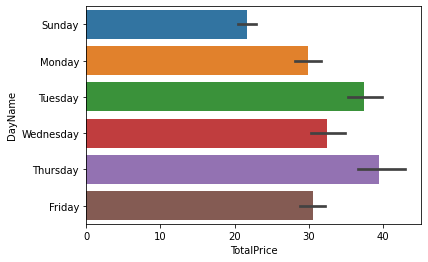

In [139]:
# Show highest sale days
sns.barplot(data = df, y = "DayName", x = "TotalPrice");

In [141]:
# Average sales by day of month
pivot = df.pivot_table(index = "Month", columns = "DayName", values = "TotalPrice",aggfunc = "mean")
pivot

DayName,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
Month,,,,,,
1,26.025000,24.766365,46.299746,40.338789,22.085097,38.347284
2,23.150000,74.194207,45.645154,18.233016,22.741106,25.395356
3,19.602969,18.164542,57.338449,27.440779,37.088345,27.024802
4,18.649273,20.037667,44.058643,30.422222,22.354359,23.642424
5,18.302639,21.383593,22.520855,34.793415,71.900937,24.977168
6,40.425342,18.821746,73.415069,38.850478,16.218297,31.145503
7,17.645641,32.434065,16.347103,19.859714,28.868000,18.439963
8,12.416514,24.139852,45.434715,29.926565,52.648891,39.625314
9,17.497778,60.180836,54.367273,18.050346,26.593925,23.590600


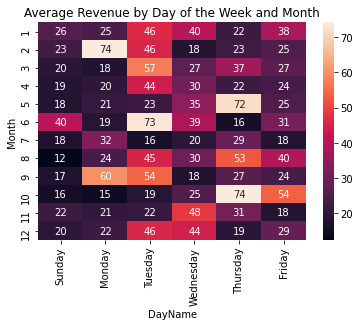

In [145]:
sns.heatmap(pivot,annot = True)
plt.title("Average Revenue by Day of the Week and Month");

No real pattern in this data

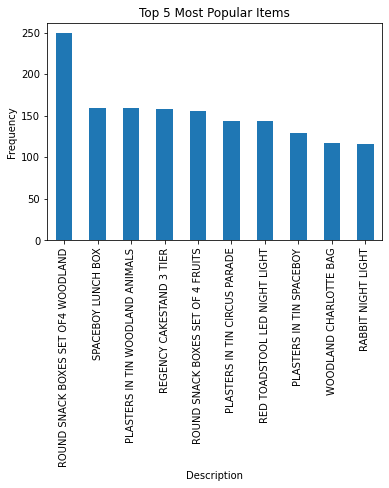

In [148]:
df["Description"].value_counts().sort_values(ascending = False).head(10).plot.bar()

plt.title("Top 5 Most Popular Items")

plt.xlabel("Description")
plt.ylabel("Frequency");

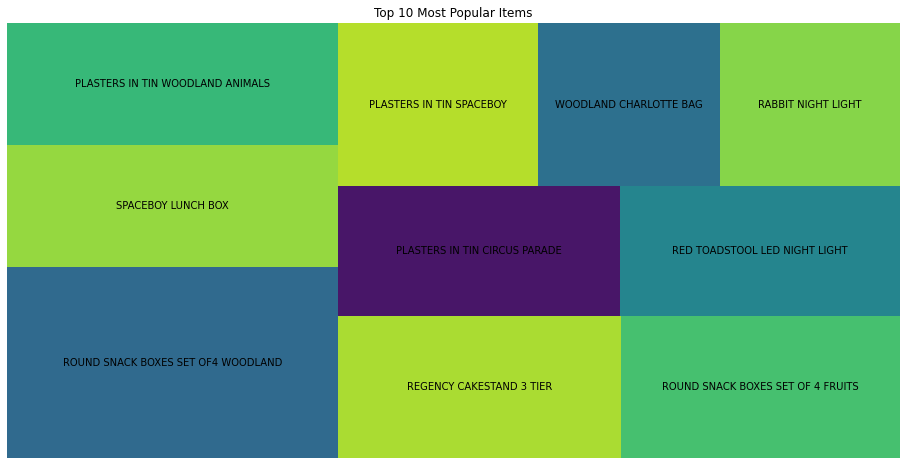

In [184]:
plt.figure(figsize = (16, 8))
x = df["Description"].value_counts().sort_values(ascending = False).head(10)
sq.plot(sizes = x, label = x.index).axis('off')
plt.title("Top 10 Most Popular Items");

In [157]:
# Remove columns not required
df = df.drop(["Quantity","InvoiceDate", "UnitPrice", "Country", "TotalPrice", "Year", "Month", "Hour", "DayOfWeek", "DayName"], axis = 1)
df.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


In [185]:
# Group items from the same invoice number together into one list of comma separated products
items_per_transaction = df.groupby("InvoiceNo").agg(",".join).reset_index()
items_per_transaction.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."


In [186]:
items_per_transaction.shape

(1116, 2)

In [195]:
# Create a list of all the items in the descriptions
item_list = [item.split(",") for item in items_per_transaction.Description]
item_list[0:1]

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE']]

In [196]:
# Encode the data as a numpy array
te = TransactionEncoder()
te_array = te.fit(item_list).transform(item_list)
te_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [197]:
# Create dataframe - rows are transactions. True/false indicates if an items was part of a transaction or not
item_df = pd.DataFrame(te_array, columns = te.columns_)
item_df.head()

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [198]:
item_df[""].value_counts()

False    1092
True       24
Name: , dtype: int64

In [200]:
# Remove the column with an empty string
item_df = item_df.drop("", axis = 1)
item_df.shape

(1116, 2368)

In [201]:
# how many transactions have the Spaceboy lunch box item?
spaceboy_box_df = item_df[item_df["SPACEBOY LUNCH BOX"] == True]
spaceboy_box_df[["SPACEBOY LUNCH BOX"]]

,SPACEBOY LUNCH BOX
0,True
14,True
48,True
57,True
71,True
...,...
1052,True
1083,True
1106,True
1107,True


In [202]:
# how many transactions have the Dolly girl lunch box item?
dolly_box_df = item_df[item_df["DOLLY GIRL LUNCH BOX"] == True]
dolly_box_df[["DOLLY GIRL LUNCH BOX"]]

,DOLLY GIRL LUNCH BOX
27,True
48,True
74,True
87,True
96,True
...,...
993,True
997,True
1017,True
1029,True


In [203]:
# How many items had both bought together?
spaceboy_dolly = item_df[(item_df["SPACEBOY LUNCH BOX"] == True) & (item_df["DOLLY GIRL LUNCH BOX"] == True)]
spaceboy_dolly[["SPACEBOY LUNCH BOX", "DOLLY GIRL LUNCH BOX"]]

,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
48,True,True
74,True,True
87,True,True
96,True,True
105,True,True
...,...,...
993,True,True
997,True,True
1017,True,True
1029,True,True


In [204]:
pd.set_option('display.max_colwidth', None)

In [205]:
# Find all frequent items sets that occur in at least 10% of the items in the data
frequent_items = apriori(item_df, min_support = 0.1, use_colnames = True)
frequent_items

,support,itemsets
0,0.103047,(PACK OF 72 RETROSPOT CAKE CASES)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
4,0.103943,(RABBIT NIGHT LIGHT)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
9,0.142473,(SPACEBOY LUNCH BOX)


In [207]:
# Sorted
frequent_items.sort_values("support", ascending = False)

,support,itemsets
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
9,0.142473,(SPACEBOY LUNCH BOX)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
11,0.107527,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)"
10,0.104839,(WOODLAND CHARLOTTE BAG)


In [208]:
# At least 5% of the transactions
frequent_items = apriori(item_df, min_support = 0.05, use_colnames = True)
frequent_items.sort_values("support", ascending = False)

,support,itemsets
43,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
52,0.142473,(SPACEBOY LUNCH BOX)
32,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
39,0.141577,(REGENCY CAKESTAND 3 TIER)
42,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
16,0.051075,(JAM MAKING SET WITH JARS)
51,0.050179,(SPACEBOY CHILDRENS BOWL)
44,0.050179,(SET OF 2 TEA TOWELS APPLE AND PEARS)
55,0.050179,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED)"


In [209]:
# At least 2% of transactions
frequent_items = apriori(item_df, min_support = 0.02, use_colnames = True)
frequent_items.sort_values("support", ascending = False)

,support,itemsets
197,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
247,0.142473,(SPACEBOY LUNCH BOX)
154,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
183,0.141577,(REGENCY CAKESTAND 3 TIER)
196,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
301,0.020609,"(CHARLOTTE BAG DOLLY GIRL DESIGN, DOLLY GIRL LUNCH BOX)"
296,0.020609,"(CHARLOTTE BAG APPLES DESIGN, PLASTERS IN TIN WOODLAND ANIMALS)"
285,0.020609,"(PLASTERS IN TIN SPACEBOY, ALARM CLOCK BAKELIKE RED)"
415,0.020609,"(LUNCH BAG RED RETROSPOT, RED RETROSPOT PICNIC BAG)"


# Association Rules

In [210]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.10)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487


In [211]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.05)
assoc_rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.142473,0.115591,0.077061,0.540881,4.679245,0.060592,1.926315
26,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.078853,0.090502,0.051971,0.659091,7.282628,0.044835,2.667861
37,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES)",0.090502,0.069892,0.050179,0.554455,7.932978,0.043854,2.087575
2,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.063620,0.060932,0.051075,0.802817,13.175642,0.047199,4.762417
7,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.129032,0.115591,0.061828,0.479167,4.145349,0.046913,1.698065


In [212]:
assoc_rules.sort_values("support", ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487
20,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
23,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614
22,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
13,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.115591,0.142473,0.077061,0.666667,4.679245,0.060592,2.572581


In [213]:
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 1)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.0,26.571429,0.026732,inf
1,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.0,28.615385,0.024213,inf
2,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.0,12.827586,0.019829,inf
3,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.0,28.615385,0.023348,inf
4,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.0,26.571429,0.023283,inf


In [215]:
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 0.9)
assoc_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.034946,0.037634,0.032258,0.923077,24.527473,0.030943,12.510753
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.022401,0.041219,0.021505,0.960000,23.290435,0.020582,23.969534
2,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
3,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
4,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444


In [216]:
assoc_rules = association_rules(frequent_items, metric = "lift", min_threshold = 28)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.025090,0.025090,0.717949,28.615385,0.024213,3.456500
2,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE BEDROOM)",(POPPY'S PLAYHOUSE LIVINGROOM),0.027778,0.025090,0.020609,0.741935,29.571429,0.019912,3.777778
3,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE BEDROOM)",0.025090,0.027778,0.020609,0.821429,29.571429,0.019912,5.444444
4,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
5,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
6,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.025090,0.024194,0.870968,34.714286,0.023497,7.555556
7,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.024194,0.024194,0.692308,28.615385,0.023348,3.171371


In [217]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.02)
assoc_rules.shape

(1188, 9)

In [218]:
assoc_rules[(assoc_rules["confidence"] >= 0.9) & (assoc_rules["lift"] >= 25)] \
    .sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
679,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
684,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1104,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
1105,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,0.023283,inf
1109,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
870,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)",(PACK OF 6 SKULL PAPER PLATES),0.022401,0.035842,0.021505,0.960000,26.784000,0.020702,24.103943
1040,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOUSE BEDROOM)",(POPPY'S PLAYHOUSE KITCHEN),0.021505,0.037634,0.020609,0.958333,25.464286,0.019800,23.096774
1038,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE BEDROOM),0.022401,0.034946,0.020609,0.920000,26.326154,0.019826,12.063172
864,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963


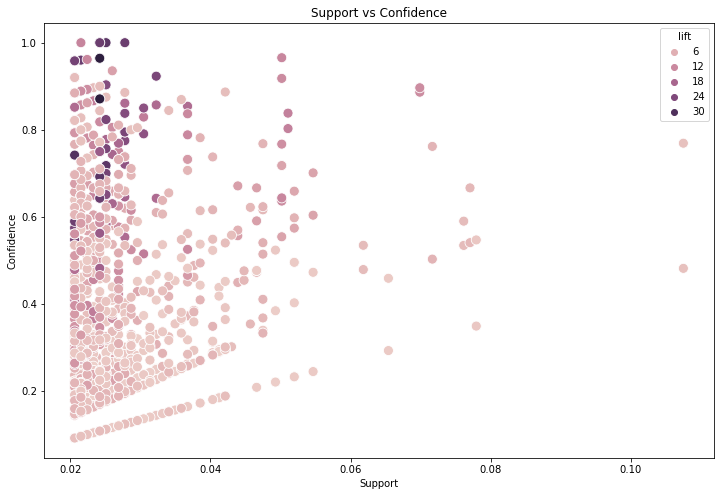

In [221]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = assoc_rules["support"], 
                y = assoc_rules["confidence"], 
                hue = assoc_rules["lift"], s = 100)
        
plt.title("Support vs Confidence")

plt.xlabel("Support")
plt.ylabel("Confidence");

In [220]:
type(assoc_rules["antecedents"][0])

frozenset

In [222]:
assoc_rules[assoc_rules["antecedents"] == {"SPACEBOY CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS BOWL),0.050179,0.037634,0.032258,0.642857,17.081633,0.030370,2.694624
134,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.050179,0.034946,0.027778,0.553571,15.840659,0.026024,2.161720
579,(SPACEBOY CHILDRENS BOWL),(ROUND SNACK BOXES SET OF4 WOODLAND),0.050179,0.223118,0.029570,0.589286,2.641136,0.018374,1.891538
613,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.050179,0.043011,0.036738,0.732143,17.022321,0.034580,3.572760
681,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742
694,(SPACEBOY CHILDRENS BOWL),"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.021505,0.020609,0.410714,19.098214,0.019530,1.660476
700,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586
706,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",0.050179,0.027778,0.024194,0.482143,17.357143,0.022800,1.877395
1096,(SPACEBOY CHILDRENS BOWL),"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY CHILDRENS CUP)",0.050179,0.024194,0.020609,0.410714,16.976190,0.019395,1.655914
1115,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586


In [223]:
assoc_rules[assoc_rules["antecedents"] == {"DOLLY GIRL CHILDRENS CUP", "SPACEBOY CHILDRENS CUP"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
685,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444
703,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.027778,0.050179,0.024194,0.870968,17.357143,0.022800,7.361111
1110,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.032258,0.024194,0.870968,27.000000,0.023297,7.500000


In [224]:
assoc_rules[assoc_rules["consequents"] == {"ALARM CLOCK BAKELIKE RED"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.026882,0.069892,0.021505,0.800000,11.446154,0.019627,4.650538
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.065412,0.069892,0.050179,0.767123,10.975764,0.045607,3.993991
13,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.028674,0.069892,0.022401,0.781250,11.177885,0.020397,4.251920
14,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.078853,0.069892,0.046595,0.590909,8.454545,0.041084,2.273596
26,(PLASTERS IN TIN SPACEBOY),(ALARM CLOCK BAKELIKE RED),0.115591,0.069892,0.020609,0.178295,2.550984,0.012530,1.131923
28,(ROUND SNACK BOXES SET OF4 WOODLAND),(ALARM CLOCK BAKELIKE RED),0.223118,0.069892,0.036738,0.164659,2.355885,0.021144,1.113446
30,(SPACEBOY LUNCH BOX),(ALARM CLOCK BAKELIKE RED),0.142473,0.069892,0.025090,0.176101,2.519594,0.015132,1.128909
624,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.043907,0.069892,0.036738,0.836735,11.971743,0.033670,5.696909
636,"(ROUND SNACK BOXES SET OF4 WOODLAND, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.029570,0.069892,0.024194,0.818182,11.706294,0.022127,5.115591
642,"(ROUND SNACK BOXES SET OF4 WOODLAND, ALARM CLOCK BAKELIKE PINK)",(ALARM CLOCK BAKELIKE RED),0.032258,0.069892,0.024194,0.750000,10.730769,0.021939,3.720430


In [225]:
assoc_rules[assoc_rules["consequents"] == {"DOLLY GIRL CHILDRENS CUP", "DOLLY GIRL CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
681,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742
687,(SPACEBOY CHILDRENS CUP),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.043011,0.032258,0.025090,0.583333,18.083333,0.023702,2.322581
1108,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.036738,0.032258,0.024194,0.658537,20.414634,0.023008,2.834101


# Recommending

In [226]:
frequent_items = apriori(item_df, min_support = 0.01, use_colnames = True)
frequent_items

,support,itemsets
0,0.013441,( BIRTHDAY CARD)
1,0.010753,( RETRO SPOT)
2,0.026882,(10 COLOUR SPACEBOY PEN)
3,0.017025,(12 PENCIL SMALL TUBE WOODLAND)
4,0.013441,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
3541,0.016129,"(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)"
3542,0.010753,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN STRONGMAN, PLASTERS IN TIN SPACEBOY)"
3543,0.016129,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN SPACEBOY, ROUND SNACK BOXES SET OF 4 FRUITS)"
3544,0.012545,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN STRONGMAN, ROUND SNACK BOXES SET OF 4 FRUITS)"


In [227]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.01)
assoc_rules.sort_values("support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2970,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
2971,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
3051,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614
2451,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.115591,0.142473,0.077061,0.666667,4.679245,0.060592,2.572581
...,...,...,...,...,...,...,...,...,...
2799,(SET/6 RED SPOTTY PAPER CUPS),(RED RETROSPOT PLATE),0.078853,0.042115,0.010753,0.136364,3.237911,0.007432,1.109130
2800,(RED RETROSPOT PLATE),(SET/6 RED SPOTTY PAPER PLATES),0.042115,0.077957,0.010753,0.255319,3.275128,0.007470,1.238172
2801,(SET/6 RED SPOTTY PAPER PLATES),(RED RETROSPOT PLATE),0.077957,0.042115,0.010753,0.137931,3.275128,0.007470,1.111147
2802,(RED RETROSPOT PLATE),(SPACEBOY LUNCH BOX),0.042115,0.142473,0.010753,0.255319,1.792051,0.004752,1.151536


In [228]:
round_snack_boxes_antecedent = assoc_rules[assoc_rules["antecedents"] == {"ROUND SNACK BOXES SET OF4 WOODLAND"}]
round_snack_boxes_antecedent = round_snack_boxes_antecedent.sort_values("support", ascending = False).head(5)
round_snack_boxes_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2970,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
2572,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.223118,0.142473,0.065412,0.293173,2.057740,0.033624,1.213206
2478,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.223118,0.115591,0.054659,0.244980,2.119361,0.028869,1.171371
3078,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.223118,0.104839,0.051971,0.232932,2.221810,0.028580,1.166990


Text(0, 0.5, 'Recommended Items')

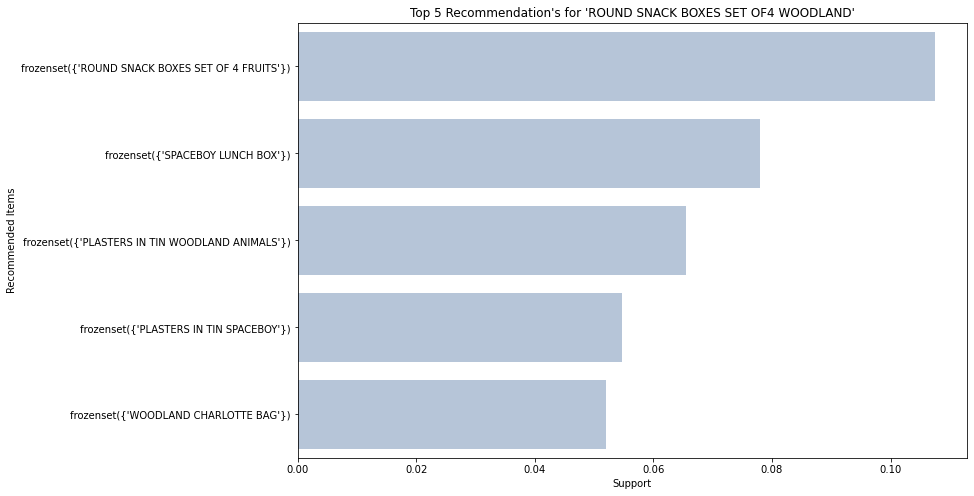

In [229]:
plt.figure(figsize = [12, 8])
x = sns.barplot(x = "support", y = "consequents", data = round_snack_boxes_antecedent, color = "lightsteelblue")
plt.title("Top 5 Recommendation's for 'ROUND SNACK BOXES SET OF4 WOODLAND'")
plt.xlabel("Support")
plt.ylabel("Recommended Items")